In [11]:
import os
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
import warnings
warnings.filterwarnings('ignore')

In [12]:
data_dir = 'trainingSet'
categories = os.listdir(data_dir)
categories.sort()
categories

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

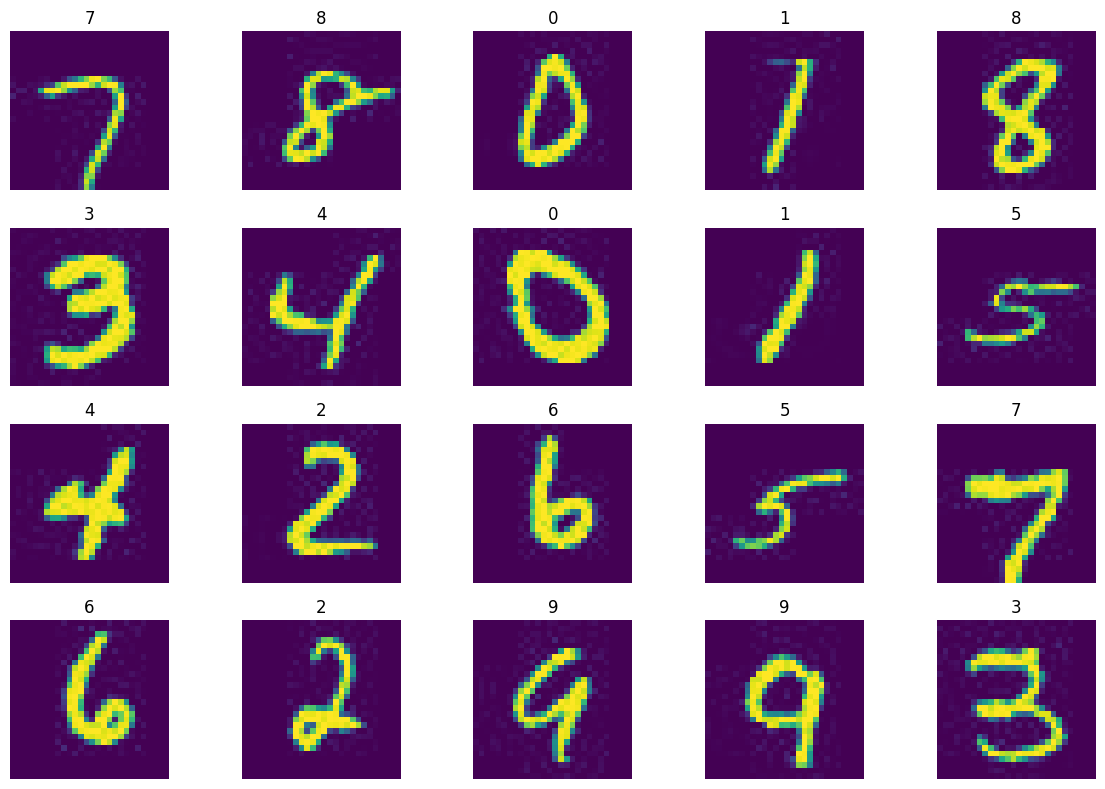

In [41]:
visual_images = []

for category in categories:
    path = os.path.join(data_dir, category)
    for image in os.listdir(path)[:2]:
        img = cv.imread(os.path.join(path, image))
        img = cv.resize(img, (28, 28))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        visual_images.append([img, category])
        

random.shuffle(visual_images)

fig, axes = plt.subplots(4, 5, figsize=(12, 8))
axes = axes.ravel()


for i, (img, category) in enumerate(visual_images):
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')



plt.tight_layout()
plt.show()

In [14]:
train_data = []


def load_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for image in os.listdir(path):
            img = cv.imread(os.path.join(path, image))
            img = cv.resize(img, (28, 28))
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            train_data.append([img, class_num])

In [15]:
load_data()
print(f'Found {len(train_data)} images from {len(categories)} categories')

Found 42000 images from 10 categories


In [16]:
for data in train_data[:10]:
    print(data[1])

0
0
0
0
0
0
0
0
0
0


In [17]:
random.shuffle(train_data)

In [18]:
for data in train_data[:10]:
    print(data[1])

7
0
3
8
8
3
0
7
5
7


In [19]:
features = []
labels = []

for data in train_data:
    features.append(data[0])
    labels.append(data[1])

In [20]:
features = np.array(features)/255
labels = np.array(labels)

In [21]:
X_train = features[:33600]
X_test = features[33600:]
y_train = labels[:33600]
y_test = labels[33600:]

In [22]:
X_train.shape, X_test.shape

((33600, 28, 28), (8400, 28, 28))

In [23]:
y_train.shape, y_test.shape

((33600,), (8400,))

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, y_train, batch_size=10, epochs=5, validation_split=0.2, validation_batch_size=10)

Epoch 1/5


2025-09-10 23:08:51.188817: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84295680 exceeds 10% of free system memory.


2688/2688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8286 - loss: 0.5344 - val_accuracy: 0.9680 - val_loss: 0.1042
Epoch 2/5
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9695 - loss: 0.0960 - val_accuracy: 0.9731 - val_loss: 0.0990
Epoch 3/5
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9813 - loss: 0.0682 - val_accuracy: 0.9741 - val_loss: 0.0880
Epoch 4/5
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9716 - val_loss: 0.1045
Epoch 5/5
2688/2688 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9866 - loss: 0.0398 - val_accuracy: 0.9808 - val_loss: 0.0782


In [28]:
model.evaluate(X_train, y_train)

2025-09-10 23:10:22.085000: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 105369600 exceeds 10% of free system memory.


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0206


[0.030138734728097916, 0.9916666746139526]

In [29]:
model.evaluate(X_test, y_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9862 - loss: 0.0512


[0.053526733070611954, 0.9851190447807312]

In [30]:
preds = []

for x in X_test:
    prediction = model.predict(np.expand_dims(x, axis=0))
    pred_class = np.argmax(prediction)
    preds.append(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [31]:
preds = np.array(preds)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.9851190476190477

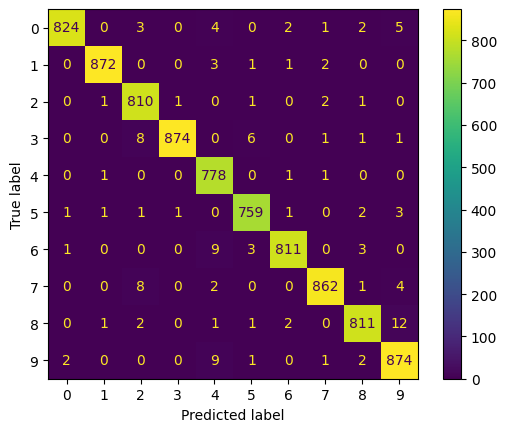

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [34]:
model.save('digits.keras')